In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
import folderparser as fp
import folderscraper as fs
from interfacePlots import *
from config import cfg
LOGGERDEFINED = fp.openLog('interfacemetrics_LapRD.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=True)

In [3]:
EFOLDERS = [os.path.join(cfg.path.server, 'yieldingsweep', s) for s in ['LapRD', 'LapRDTall']]
EXPORTFOLDER = os.path.join(cfg.path.fig, 'yieldingsweep', 'plots')

# Generating files

In [6]:
import traceback

In [ ]:
import pandas as pd
o = []
for topfolder in EFOLDERS:
    for f in os.listdir(topfolder):
        ffull = os.path.join(topfolder, f)
        try:
            fs.populate(ffull)
        except:
            pass
        else:
            l = fp.legendUnique(ffull)
            if len(l)>0:
                o.append(l)
p = pd.DataFrame(o)
p.to_csv(os.path.join(cfg.path.fig, 'yieldingsweep','LapRD_legend_general.csv'))

In [5]:
for topfolder in [EFOLDERS[0]]:
    for folder in fp.caseFolders(topfolder):
        intm.sumAndSteady(folder, True)

DEBUG: //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\yieldingsweep\LapRD\nb1100
INFO:     Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\yieldingsweep\LapRD\nb1100\sliceSummaries.csv
INFO:     Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\yieldingsweep\LapRD\nb1100\steadyTimes.csv
INFO:     Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\yieldingsweep\LapRD\nb1100\steadyPositions.csv
DEBUG: //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\yieldingsweep\LapRD\nb1101
INFO:     Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\yieldingsweep\LapRD\nb1101\sliceSummaries.csv
INFO:     Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\yieldingswe

# Plots

`('nuink', 'tau0ink', 'kink', 'nink', 'nusup', 'tau0sup', 'ksup', 'nsup', 'sigma')`

Exported  C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\yieldingsweep\plots\LapRD\names_LapRD_xvar_ink_yvar_sup


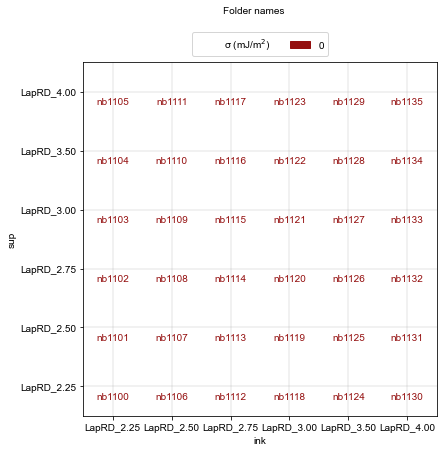

In [18]:
txtPlots0(EFOLDERS[0], EXPORTFOLDER, xvar='ink', yvar='sup', overwrite=False)

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\yieldingsweep\plots\LapRD\simrate_LapRD_xvar_ink_yvar_sup
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\yieldingsweep\plots\LapRD\runtime_LapRD_xvar_ink_yvar_sup


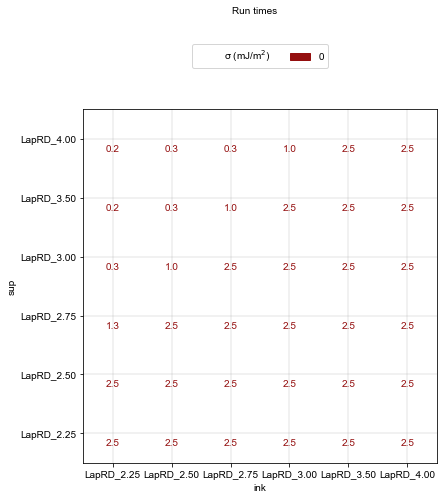

In [8]:
for i, TOPFOLDER in enumerate([EFOLDERS[0]]):
    xvar = 'ink'
    yvar = 'sup'
    txtPlots0(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=False)
    timePlots(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=True)
    runtimePlots0(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=True)
    inklist = ['LapRD_2.25','LapRD_2.50','LapRD_2.75','LapRD_3.00','LapRD_3.50','LapRD_4.00']
    suplist = inklist
        
    xposition = 5
    for t in [2.5]:
        for s in [['arean', 0.7, 1.8], ['vertdispn', 0, 1], ['aspectratio', 0.6, 1.7], ['speeddecay', 0.5, 1.0]]:
            metricPlots(TOPFOLDER, EXPORTFOLDER, t, xposition, s[0], xvar=xvar, yvar=yvar,\
                        inklist=inklist, suplist=suplist, adjustBounds=False, split=True, overwrite=False, tmin=s[1], tmax=s[2])
            
    for t in [1, 2.5]:
        for ta in ['y_umag', 'y_viscy', 'x_viscx', 'y_shearratey']:
            picPlots0(TOPFOLDER, EXPORTFOLDER, t, 0, tag=ta, xvar=xvar, yvar=yvar, \
                      inklist=inklist, suplist=suplist, adjustBounds=False, overwrite=False)
    
    for t in [2.5]:
        xposition = 5
        XSPlots0(TOPFOLDER, EXPORTFOLDER, t, xposition, [0], xvar=xvar, yvar=yvar,\
                 inklist=inklist, suplist=suplist, adjustBounds=False, overwrite=False)
    
#     for sigma in [0]:
#         imsize=1.3
#         steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [sigma], xvar=xvar, yvar=yvar,\
#                     inklist=inklist, suplist=suplist, adjustBounds=False, overwrite=False)

In [ ]:
import pandas as pd
metrics = []
for TOPFOLDER in EFOLDERS:
    for f in os.listdir(TOPFOLDER):
        try:
            m = metricVals(os.path.join(TOPFOLDER, f), 2.5, 5, ['arean', 'vertdispn', 'aspectratio', 'speeddecay'])
        except:
            pass
        else:
            metrics.append(m)
df = pd.DataFrame(metrics)
df

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3,sharex='col', sharey='row',figsize=(6.5,6.5))
cmap = plt.get_cmap('tab20c')

for t in range(len(EFOLDERS)):
    TOPFOLDER = EFOLDERS[t]
    metrics = []
    for f in os.listdir(TOPFOLDER):
        try:
            m = metricVals(os.path.join(TOPFOLDER, f), 2.5, 5, ['arean', 'vertdispn', 'aspectratio', 'speeddecay'])
        except:
            pass
        else:
            metrics.append(m)
    df = pd.DataFrame(metrics)

    df2 = df[df['arean']<3]
    df2 = df2[df2['vertdispn']>-0.1]
    df2 = df2[df2['vertdispn']<1.2]
    df2 = df2[df2['speeddecay']<1.1]

    slist = df.keys()
    for i in range(4):
        for j in range(i):
            color = cmap(t/3)
            if j==0 and i==1:
                axs[j,i-1].scatter(df2[slist[i]], df2[slist[j]], s=5, color=color, label=os.path.basename(TOPFOLDER))
            else:
                axs[j,i-1].scatter(df2[slist[i]], df2[slist[j]], s=5, color=color)
            axs[j,i-1].set_xlabel(slist[i])
            axs[j,i-1].set_ylabel(slist[j])
axs[0,0].legend()
